In [1]:
using BasisFunctions
using FrameFuns
using PyPlot

# One-dimensional smoothing

In [36]:
B = FourierBasis(301)
D = Interval(-0.5,0.5)
f(x) = exp(x)
fscale(i) = 10.0^-4+abs(i)+abs(i)^2+abs(i)^3
F = Fun(f,B,D; solver=FrameFuns.FE_ProjectionSolver)
F2 = Fun(f,B,D;solver=FrameFuns.FE_SmoothProjectionSolver)

A 1-dimensional FrameFun with 301 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


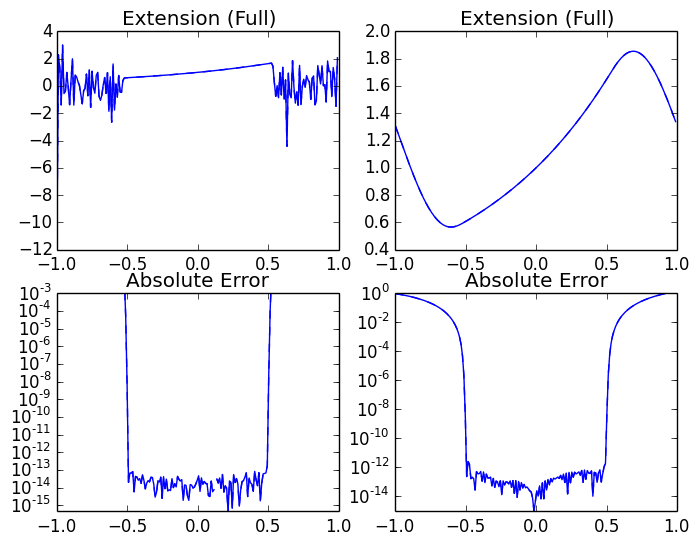

PyObject <matplotlib.text.Text object at 0x32f6e98d0>

In [38]:
subplot(221); FrameFuns.plot_expansion(F)
subplot(222); FrameFuns.plot_expansion(F2)
subplot(223); FrameFuns.plot_error(F,f)
subplot(224); FrameFuns.plot_error(F2,f)

### Scaling function determines coefficients decay

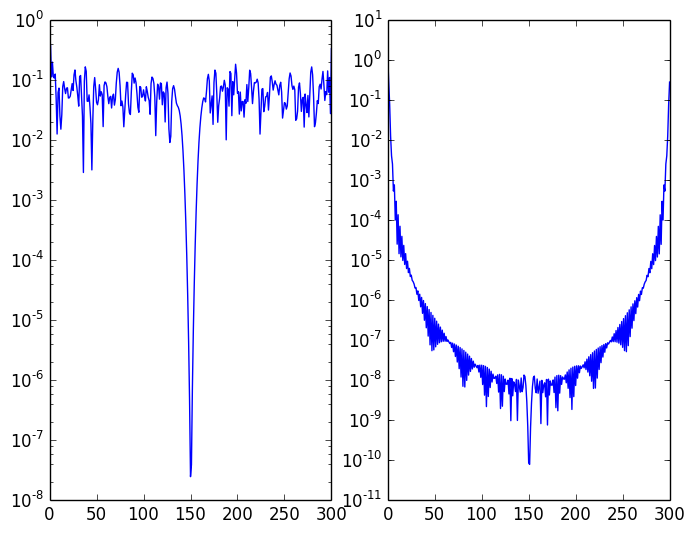

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32feeb750>

In [39]:
subplot(121); PyPlot.semilogy(abs(coefficients(F)))
subplot(122); PyPlot.semilogy(abs(coefficients(F2)))

### Scaling the $L_{2}$ norm 

In [40]:
B = FourierBasis(301)
D = Interval(-0.5,0.5)
f(x) = exp(x)
fscale(i) = 1.0
F2 = Fun(f,B,D;solver=FrameFuns.FE_SmoothProjectionSolver, scale=fscale)

A 1-dimensional FrameFun with 301 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


The algorithm minimizes the $L_2$ norm of the extension. There seems to be some precision loss in the interior.

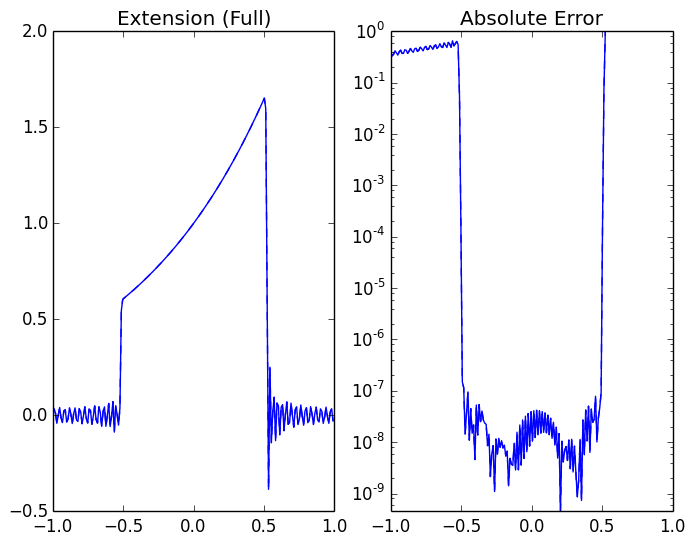

PyObject <matplotlib.text.Text object at 0x3304a7ed0>

In [42]:
subplot(121); FrameFuns.plot_expansion(F2)
subplot(122); FrameFuns.plot_error(F2,f)

# Two-dimensional smoothing

In [53]:
B = FourierBasis(30)⊗FourierBasis(30)
D = Disk(0.5)
f(x,y) = exp(x*y)
fscale(i,j) = 10.0^-4+100*(abs(i)^2+abs(j)^2)
F = Fun(f,B,D,solver=FrameFuns.FE_ProjectionSolver,)
F2 = Fun(f,B,D,solver=FrameFuns.FE_SmoothProjectionSolver,scale=fscale)

A 2-dimensional FrameFun with 900 degrees of freedom.
Basis: tensor product (Fourier series x Fourier series)
Domain: a circle of radius 0.5 centered at [0.0,0.0]


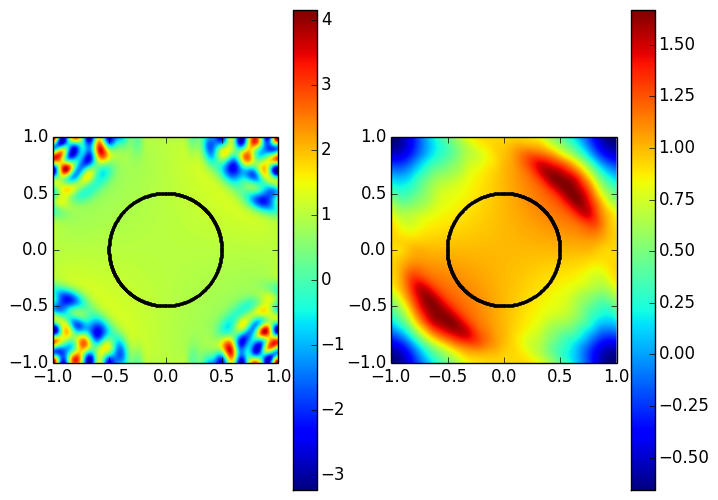

PyObject <matplotlib.colorbar.Colorbar instance at 0x336ba6d40>

In [54]:
subplot(121); FrameFuns.plot_image(F,unscaled=true)
subplot(122); FrameFuns.plot_image(F2,unscaled=true)

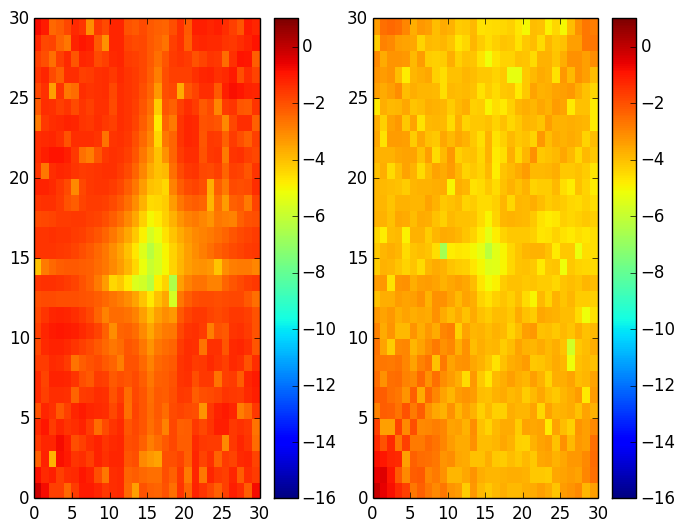

PyObject <matplotlib.colorbar.Colorbar instance at 0x33567e0e0>

In [55]:
D = IdxnScalingOperator(B, scale=fscale)
AD = inv(D)
subplot(121); PyPlot.pcolormesh(log10(abs(coefficients(F))),vmin=-16,vmax=1)
PyPlot.colorbar()
subplot(122); PyPlot.pcolormesh(log10(abs(coefficients(F2))),vmin=-16,vmax=1)
PyPlot.colorbar()

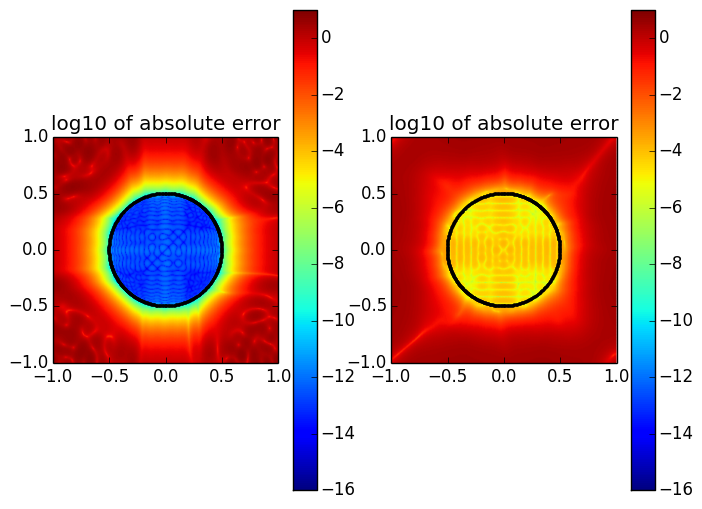

PyObject <matplotlib.text.Text object at 0x3247c6490>

In [51]:

    subplot(121)
    FrameFuns.plot_error(F,f)

    subplot(122)
    FrameFuns.plot_error(F2,f)


# Convergence of the extension

### Fourier

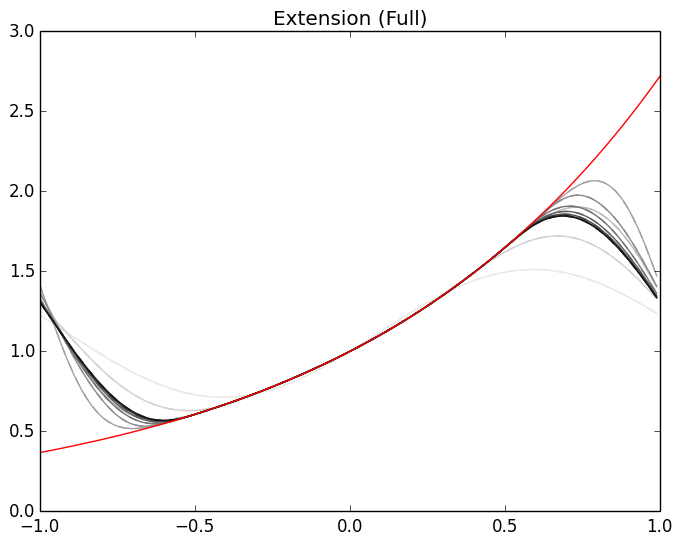

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3356d1a90>

In [56]:
f(x)=exp(x)
D = Interval(-0.5,0.5)
fscale(i) = 10.0^-8+(abs(i))^3+(abs(i))^2+(abs(i))
for i =1:10
    Bi = FourierBasis(2^i+1)
    F3 = Fun(f,Bi,D,solver=FrameFuns.FE_SmoothProjectionSolver, scale=fscale)
    FrameFuns.plot_expansion(F3,color=[1-i/11; 1-i/11; 1-i/11])
end
# The extension converges to something that is 'not' the original function
x = -1:0.01:1
PyPlot.plot(x,f(x),color="red")

### Chebyshev

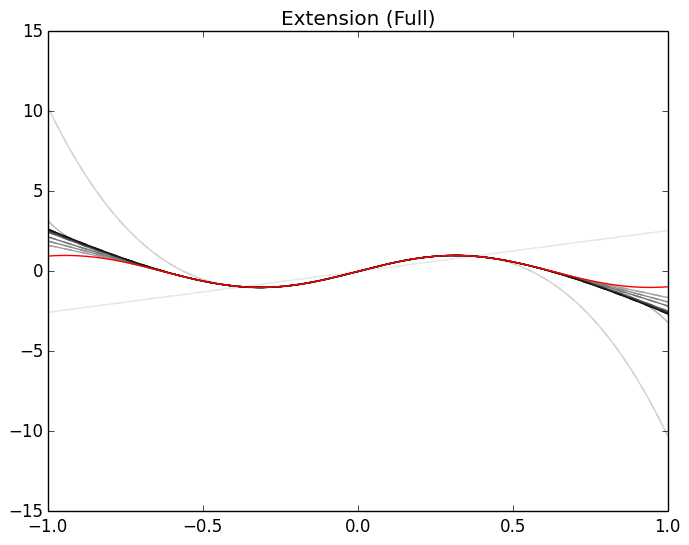

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33eb04d90>

In [60]:
f(x)=sin(5*x)
D = Interval(-0.5,0.5)
fscale(i) = 10.0^-8+(abs(i))^3+(abs(i))^2+(abs(i))
for i =1:10
    Bi = ChebyshevBasis(2^i+1)
    F3 = Fun(f,Bi,D,solver=FrameFuns.FE_SmoothProjectionSolver, scale=fscale)
    FrameFuns.plot_expansion(F3,color=[1-i/11; 1-i/11; 1-i/11])
end
# The extension converges to something that is 'not' the original function
x = -1:0.01:1
PyPlot.plot(x,f(x),color="red")